## Image Clustering

In [103]:
from matplotlib.image import imread
from sklearn.cluster import KMeans

In [410]:
# Read image
image = imread('/content/test_image.png')
image.shape

(319, 425, 3)

In [414]:
X = image.reshape(-1,3)
X

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [552]:
# cluster
kmeans = KMeans(n_clusters = 3).fit(X)

In [553]:
# Segmenting colors = make the similar colors equal to the average color
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

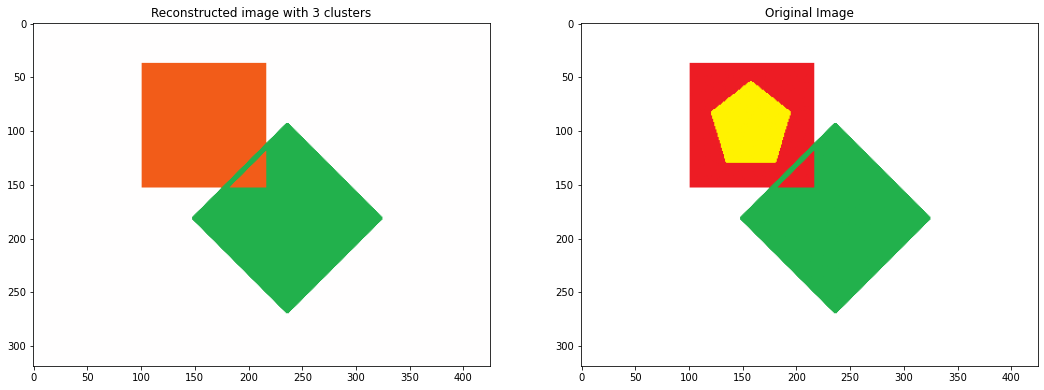

In [419]:
plt.figure(figsize=(18,10))
# clustered image
plt.subplot(121)
plt.imshow(segmented_img)
plt.title('Reconstructed image with 3 clusters')

#original image
plt.subplot(122)
plt.imshow(image)
plt.title('Original Image');

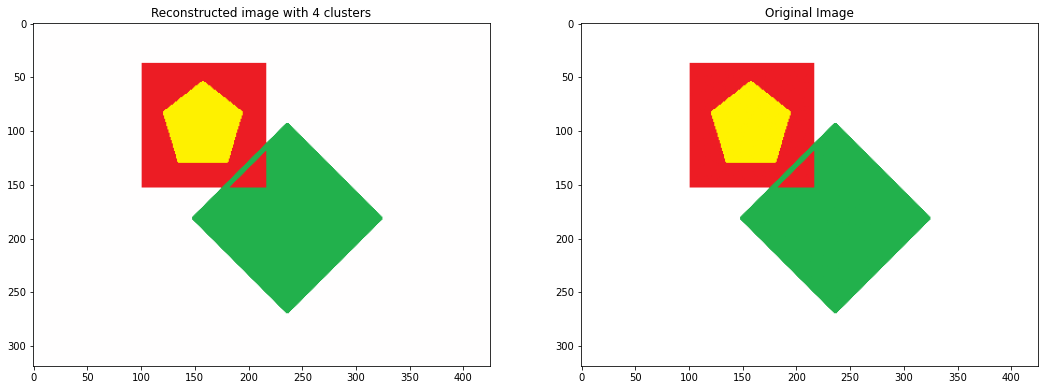

In [529]:
# cluster
kmeans = KMeans(n_clusters = 4).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.figure(figsize=(18,10))
# clustered image
plt.subplot(121)
plt.imshow(segmented_img)
plt.title('Reconstructed image with 4 clusters')

#original image
plt.subplot(122)
plt.imshow(image)
plt.title('Original Image');

In [527]:
# Segmenting the image by cluster
seg = np.array([])
for cluster in np.unique(kmeans.labels_):
  cluster_img = kmeans.cluster_centers_[kmeans.labels_[kmeans.labels_ == cluster]]
  seg = np.concatenate((seg, cluster_img), axis=None)

In [554]:
segmented_img

array([[1.0000509 , 0.9999582 , 0.99992925],
       [1.0000509 , 0.9999582 , 0.99992925],
       [1.0000509 , 0.9999582 , 0.99992925],
       ...,
       [1.0000509 , 0.9999582 , 0.99992925],
       [1.0000509 , 0.9999582 , 0.99992925],
       [1.0000509 , 0.9999582 , 0.99992925]], dtype=float32)

## Dimensionality Reduction

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

If we add the KMeans in a pipeline, it will return the distances of the data points to the cluster centroids. So, a dataset with 50 features can be reduced to 5 features (the distances to each 5 clusters)

In [236]:
# Dataset
X, y = make_classification(n_samples=300, n_features=100, n_informative=5, random_state=42)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
pd.DataFrame(X).head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.004042,0.126476,1.062770,-0.779052,-1.481767,-0.213955,0.434937,0.660421,-0.895505,0.239770,...,-0.531372,-0.344815,-0.127037,0.342572,1.420618,-0.195424,0.399269,2.075412,-0.868596,0.090791
1,-2.060477,-1.240909,-2.600121,-1.463626,1.251529,0.244435,2.518714,-0.354855,0.191772,0.133240,...,-0.302928,-0.380072,-0.128774,1.118498,-0.767738,0.631635,-0.019515,-2.158497,-0.047980,-0.306045
2,1.471979,-0.225287,-0.901253,-0.862103,1.877002,-1.367941,1.133813,0.305212,1.307389,-0.124043,...,0.857029,-0.415684,-0.805202,-1.739160,1.800133,-1.821593,-0.628623,3.272630,-2.023266,-1.625110


In [238]:
# Pipeline to reduce dimensionality
pipe = Pipeline([('kmeans', KMeans(5))])
pipe.fit_transform(X)

array([[11.00819187,  8.96010926,  9.23522856, 10.00567547, 11.74491346],
       [12.43645514, 12.01404955, 11.42592645, 12.91248904, 11.01784081],
       [11.64583473, 10.77864321, 11.28586987, 10.04134036, 12.95205203],
       ...,
       [ 9.56307784,  9.33617686,  9.60844508,  8.76381595, 11.95547496],
       [10.51791764, 10.24856972, 10.91687434, 10.85645937, 12.21264175],
       [12.19987682, 11.3256885 , 11.8560353 , 12.10503429, 13.45216514]])

In [248]:
pipe1 = Pipeline([('Logit', LogisticRegression())])
pipe1.fit(X_train, y_train)


pipe2 = Pipeline([('kmeans', KMeans(12)),
                  ('Logit', LogisticRegression())])
pipe2.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=12)),
                ('Logit', LogisticRegression())])

In [249]:
# Score 1
pipe1.score(X_test, y_test)

0.7333333333333333

In [250]:
# Score 2
pipe2.score(X_test, y_test)

0.8166666666666667